In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
os.environ['OMP_NUM_THREADS'] = '1'

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [ ]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# sns.pairplot(dataset.iloc[:, [2,3,4]])

## Part One: KMeans Clustering

In [4]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, [3,4]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

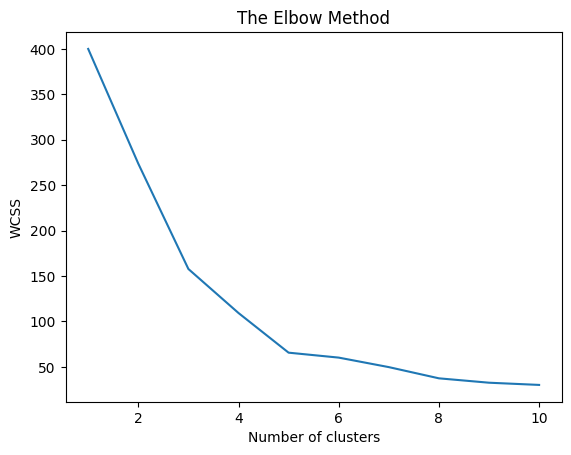

In [5]:
from sklearn.cluster import KMeans

wcss = []
start_index = 1
stop_index = 11

for i in range(start_index, stop_index):
    kmeans = KMeans(n_init='auto', n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(start_index, stop_index), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
num_clusters = 5 # inferred from elbow chart
kmeans = KMeans(n_init='auto', n_clusters=num_clusters, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

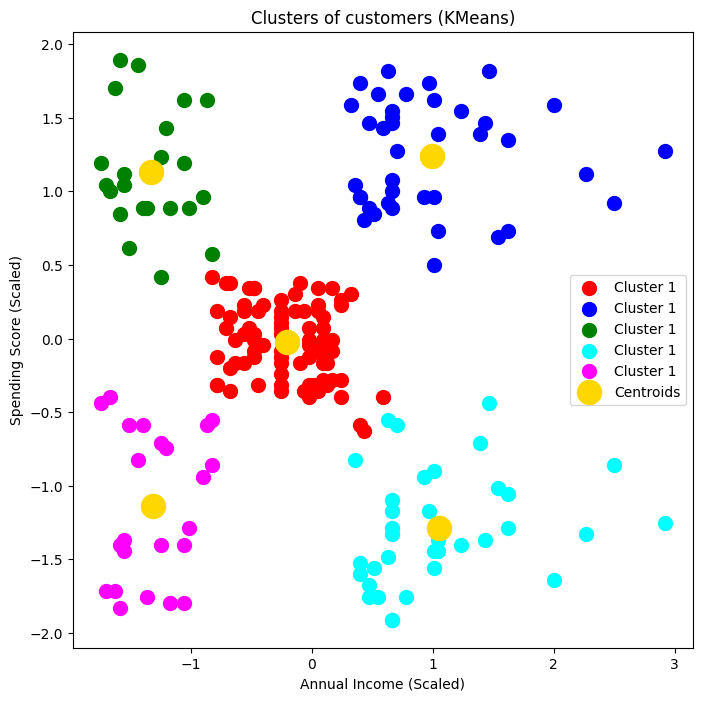

In [7]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for j in range(0, num_clusters):
    # creates a filter like so X[True/False, data_column]
    # column 0 for annual income, 1 for spending score
    x_axis = X[y_means==j, 0]
    y_axis = X[y_means==j, 1]
    plt.scatter(x_axis, y_axis, s=100, c=colors[j], label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label='Centroids')
plt.title('Clusters of customers (KMeans)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Two: Hierarchical Clustering

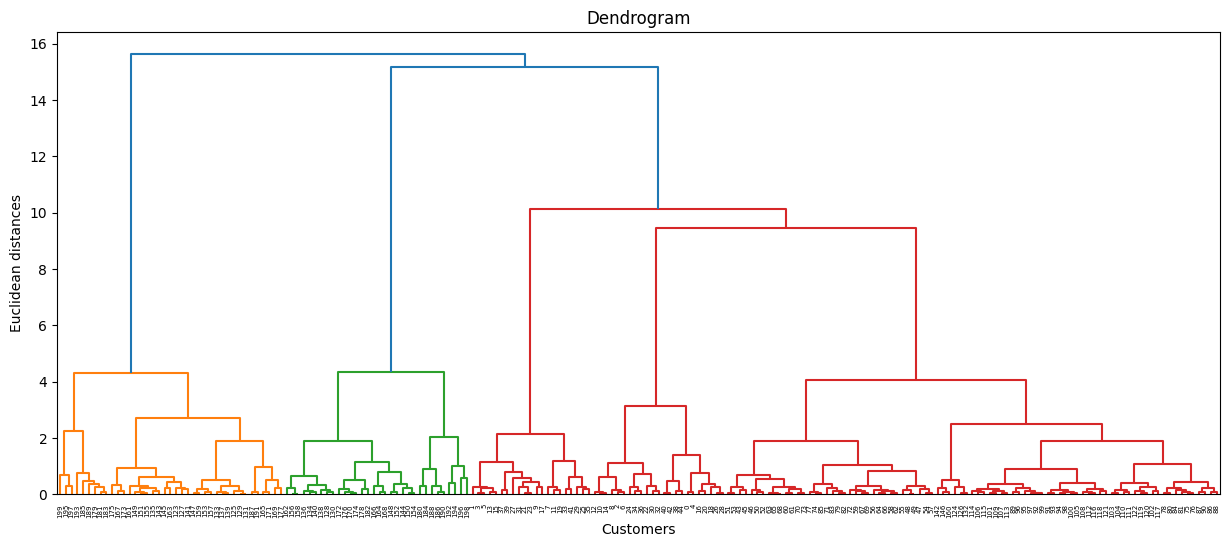

In [8]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))
Z = sch.linkage(X, method='ward')
dendrogram = sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
hc = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

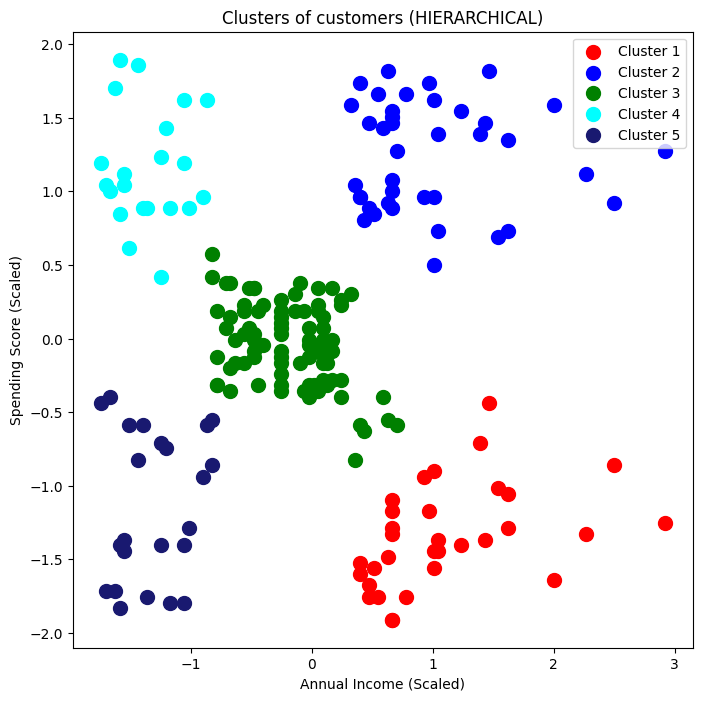

In [10]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'midnightblue']
for j in range(0, num_clusters):
    x_axis = X[y_hc==j, 0]
    y_axis = X[y_hc==j,1]
    plt.scatter(x_axis, y_axis, s=100, c=colors[j], label=f'Cluster {j+1}')

plt.title('Clusters of customers (HIERARCHICAL)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Three: DBSCAN

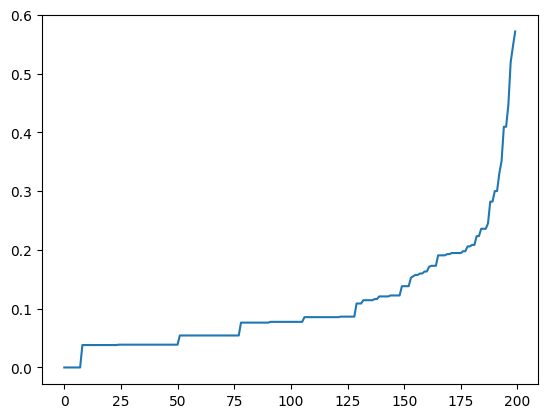

In [11]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, _ = neighbours.fit(X).kneighbors(X)

# print(distances)

distances = distances[:, 1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

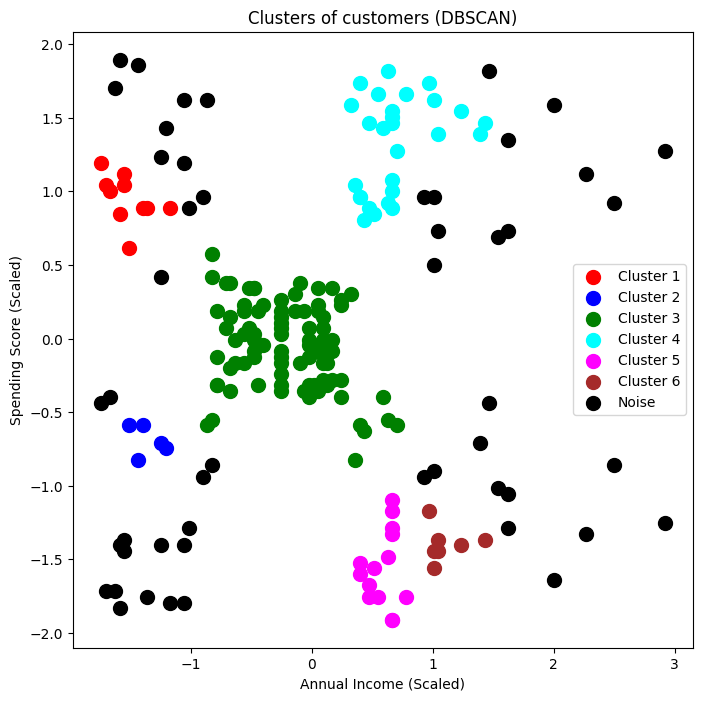

In [13]:
plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'brown']
for j in range(0, 6):
    x_axis = X[y_dbscan==j, 0]
    y_axis = X[y_dbscan==j, 1]
    plt.scatter(x_axis, y_axis, s=100, c=colors[j], label=f'Cluster {j+1}')

plt.scatter(X[y_dbscan==-1,0], X[y_dbscan==-1,1], s=100, c='black', label='Noise')

plt.title('Clusters of customers (DBSCAN)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

## Part Four: Clustering Data with Higher Dimensionality

In [ ]:
financials = pd.read_csv('data/costpercompany.csv')
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


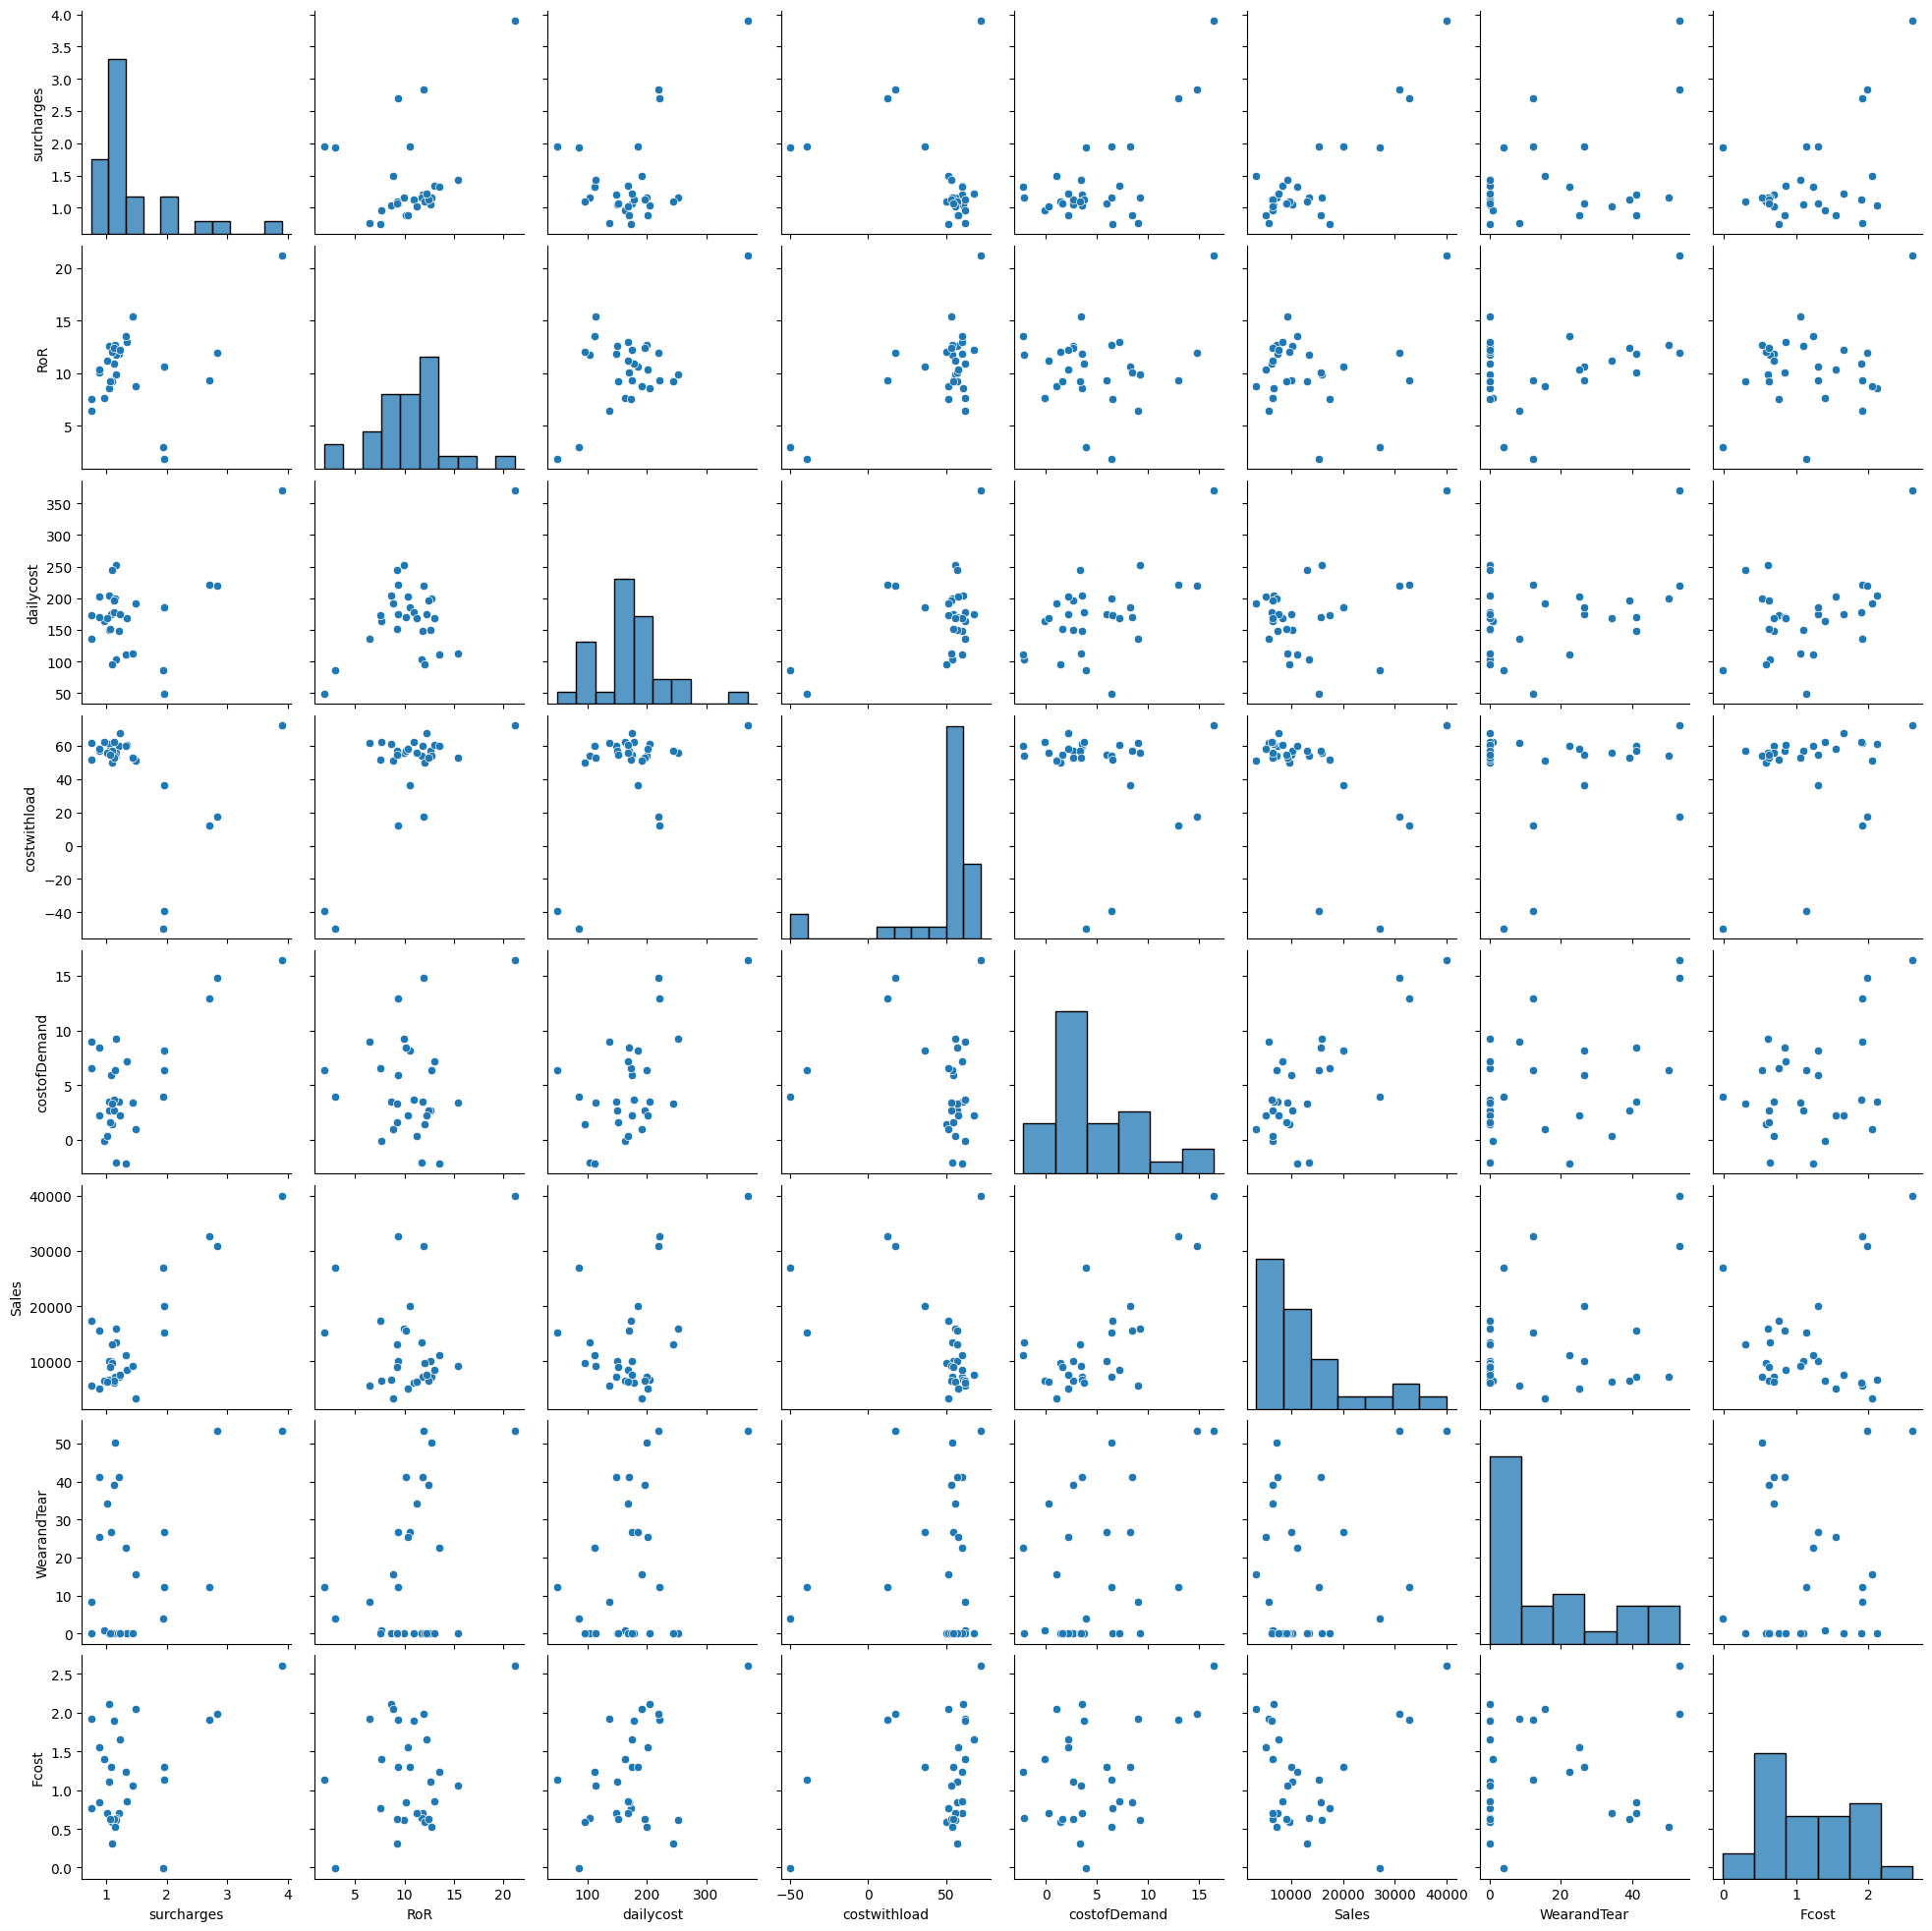

In [15]:
X = financials.iloc[:, 1:9]
sns.pairplot(X)

Text(0, 0.5, 'WCSS')

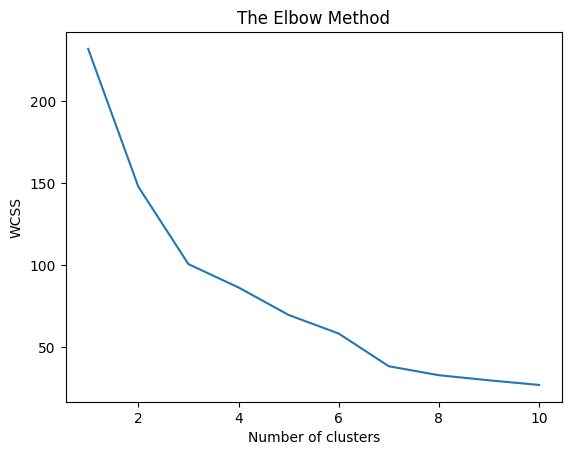

In [16]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

wcss = []
start_index = 1
stop_index = 11
for i in range (start_index, stop_index):
    kmeans = KMeans(n_init='auto', n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(start_index, stop_index), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [17]:
kmeans = KMeans(n_init='auto', n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2], dtype=int32)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_
print('Sum variance ration: ', sum(pca.explained_variance_ratio_))

Sum variance ration:  0.7056440181560044


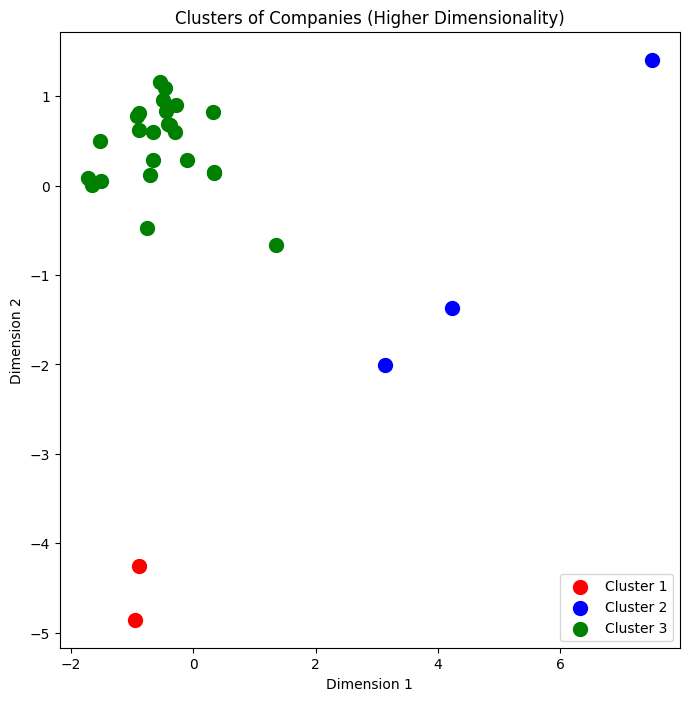

In [19]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    x_axis = [X_reduced[y_kmeans==i, 0]]
    y_axis = [X_reduced[y_kmeans==i, 1]]
    plt.scatter(x_axis, y_axis, s=100, c=colors[i], label=f'Cluster {i+1}')

plt.title('Clusters of Companies (Higher Dimensionality)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

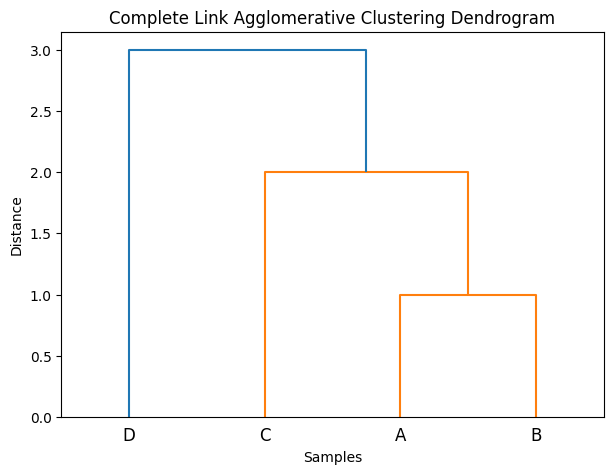

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Distance matrix from Image 1 (A, B, C, D)
# We represent this as a condensed distance matrix for linkage()
# Distances: AB=1, AC=4, AD=5, BC=2, BD=6, CD=3
distances = np.array([1, 4, 5, 2, 6, 3])

# Perform hierarchical clustering using complete linkage
Z = linkage(distances, method='single')

# Plot dendrogram
plt.figure(figsize=(7, 5))
dendrogram(Z, labels=["A", "B", "C", "D"])
plt.title("Complete Link Agglomerative Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
